In [12]:
import pandas as pd
df_weights_scaled_subs = pd.read_pickle("df_weights_scaled_subs_fapar_model_trg_v20230918.pkl") 

In [3]:
df_weights_scaled_subs

,hfp,pop_count,bio10,bio11,bio12,bio13,bio14,bio15,bio16,bio17,...,stratum,diff_tasactual_longterm,diff_practual_longterm,fapar_p95_smooth,wv_yearly_p25,wv_yearly_p50,wv_yearly_p75,fapar_q,sample_weight,fapar_value
8711709,3.0,0.0,3060.0,2855.0,1059.0,255.0,4.0,1042.0,684.0,34.0,...,1,-0.400024,14.0,0.0,820.0,938.0,1164.0,95,3.039268e+06,0.0
2506657,11.0,0.0,2941.0,2598.0,2768.0,530.0,131.0,460.0,1139.0,422.0,...,1,-1.099976,358.0,56.0,555.0,733.0,1195.0,50,3.039268e+06,0.184
1904670,2.0,0.0,2920.0,2801.0,5874.0,1374.0,32.0,917.0,3495.0,180.0,...,1,-1.700012,63.0,52.0,571.0,839.0,1311.0,50,3.039268e+06,0.184
2386594,26.0,0.0,3049.0,2966.0,7688.0,1970.0,21.0,998.0,4689.0,141.0,...,1,-0.600006,587.0,113.0,2017.0,2489.0,3477.0,50,3.039268e+06,0.44
8414420,4.0,0.0,3036.0,2871.0,2516.0,444.0,42.0,559.0,1078.0,185.0,...,1,1.699982,-115.0,11.0,890.0,1147.0,1481.0,95,3.039268e+06,0.044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9938139,16.0,0.0,3081.0,2927.0,791.0,252.0,2.0,1235.0,554.0,18.0,...,7,-2.100006,-282.0,0.0,1839.0,2058.0,2299.0,95,1.618035e+06,0.0
7720980,38.0,0.0,2922.0,2673.0,7619.0,854.0,364.0,259.0,2543.0,1233.0,...,15,-0.5,77.0,145.0,575.0,867.0,1691.0,95,9.574680e+03,0.62
3230751,0.0,0.0,2996.0,2673.0,245.0,58.0,5.0,820.0,142.0,19.0,...,18,-0.600006,-23.0,0.0,426.0,799.0,1279.0,50,2.701686e+06,0.0
2033978,5.0,0.0,2911.0,2815.0,9430.0,2150.0,29.0,1019.0,6126.0,142.0,...,1,0.200012,-860.0,178.0,881.0,1035.0,1277.0,50,3.039268e+06,0.688


In [4]:
covs_rfe = ['hfp',
 'pop_count',
 'bio10',
 'bio11',
 'bio12',
 'bio13',
 'bio14',
 'bio15',
 'bio16',
 'bio17',
 'bio1',
 'bio2',
 'bio3',
 'bio4',
 'bio5',
 'bio6',
 'bio7',
 'gsl',
 'scd',
 'dtm_slope',
 'dtm_aspect-cosine',
 'dtm_aspect-sine',
 'dtm_downlslope.curvature',
 'dtm_upslope.curvature',
 'dtm_elevation',
 'dtm_cti',
 'dtm_neg.openess',
 'dtm_pos.openess',
 'dtm_vbf',
 'siliciclastic.sedimentary',
 'metamorphics',
 'intermediate.volcanics',
 'unconsolidated.sediment',
 'crop_intensity',
 'forest_ind',
 'cropland_ind',
 'grassland_ind',
 'shrubland_ind',
 'geomt_max',
 'geomt_min',
 'geomt_gap_maxmin',
 'accum_pr_monthly',
 'log_csum_pr_annual',
 'tmin_monthly',
 'tmax_monthly',
 'tas_monthly',
 'nightlights',
 'tas_lt_monthly',
 'pr_lt_monthly',
 'diff_tasactual_longterm',
 'diff_practual_longterm',
 'fapar_q']

In [54]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import matplotlib


def ccc_score(x,y):
    ''' Concordance Correlation Coefficient'''
    sxy = np.sum((x - x.mean())*(y - y.mean()))/x.shape[0]
    rhoc = 2*sxy / (np.var(x) + np.var(y) + (x.mean() - y.mean())**2)
    return rhoc

def ccc_weight_score(x,y, weights):
    ''' Concordance Correlation Coefficient'''
    xmean_weight = np.average(x, weights=weights)
    ymean_weight = np.average(y, weights=weights)
    sxy = np.sum(weights*((x - xmean_weight))*(y - ymean_weight))/len(x)
    rhoc = 2*sxy / ( (np.sum(weights*((x - xmean_weight)**2))/len(x)) + (np.sum(weights*((y - ymean_weight)**2))/len(y)) + ((xmean_weight - ymean_weight)**2)) 
    return rhoc


def accuracy_plot(y_test, y_pred, sample_weight, n_covs, title = 'RandomForestRegressor'):
    r2_weight = r2_score(y_test, y_pred, sample_weight=sample_weight, multioutput='uniform_average')
    rmse_weight = mean_squared_error(y_test, y_pred, sample_weight=sample_weight, multioutput='uniform_average', squared=False)
    ccc_weight = ccc_weight_score(y_test, y_pred, sample_weight)
    n_covs = len(landmapper.feature_cols)
    adj_r2_weight = 1- ((1-r2_weight) * (len(y_test)-1)/(len(y_test)-n_covs-1))
    mae_weight = mean_absolute_error(y_test, y_pred, sample_weight=sample_weight)
    
    r2 = r2_score(y_test, y_pred, multioutput='uniform_average')
    rmse = mean_squared_error(y_test, y_pred, multioutput='uniform_average', squared=False)
    ccc = ccc_score(y_test, y_pred)
    adj_r2 = 1- ((1-r2) * (len(y_test)-1)/(len(y_test)-n_covs-1))
    mae = mean_absolute_error(y_test, y_pred)
                 
    matplotlib.rcParams.update({'font.size': 16})
    fig = plt.figure(figsize = (8,8))
    fig.suptitle(title, fontsize=20, fontweight='bold', y=0.99)
    plt.title(f'    With weights: R2={r2:.2f}, Adjusted R2={adj_r2:.2f}, CCC={ccc:.2f}, RMSE={rmse:.4f}, , MAE={mae:.2f} \n Without weights: R2={r2_weight:.2f}, Adjusted R2={adj_r2_weight:.2f}, CCC={ccc_weight:.2f}, RMSE={rmse_weight:.4f}, , MAE={mae_weight:.2f}')
    #plt.title(f'Grain yield (kg/ha), model: {model_type} \n n = {results_bind.shape[0]}, R2:{round(r2_score(y_viz,results_bind),3)} CCC:{round(ccc(results_bind,y_viz),3)}')
    # Make the plot
    plt.hexbin(y_test, y_pred, gridsize=(100, 100) , cmap = 'plasma_r', mincnt=5, vmax = 2000, xscale =20, yscale = 20)
    
    plt.xlabel('truth'), plt.ylabel('prediction')

#     plt.axis('equal')
    #plt.ylim(0, 12000), plt.xlim(0, 12000)

    # square plot
    ax = plt.gca()
    ax.set_aspect('auto', adjustable='box')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    #diagonal 
    ax.plot([0, 1], [0, 1], "-k", alpha = 1, color="lightgrey", linewidth=2)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    
    # Create new axes according to image position
    cax = fig.add_axes([ax.get_position().x1+0.05,
                        ax.get_position().y0,
                        0.02,
                        ax.get_position().height])

    # Plot vertical colorbar
    cb = plt.colorbar(cax=cax)
    #cb.outline.set_visible(False)
    #cb.set_ticks([1,100,200,300])

    plt.show()

In [ ]:
from eumap.mapper import build_ann
from eumap.mapper import LandMapper
from eumap.misc import ttprint
from pathlib import Path
from scipy.signal import argrelmin
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.experimental import enable_halving_search_cv 
from sklearn.feature_selection import RFECV, RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GroupKFold, KFold
from sklearn.model_selection import HalvingRandomSearchCV, RandomizedSearchCV
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from scipy.stats import uniform, randint
import joblib
import multiprocessing
import numpy as np
import pandas as pd
import pyarrow.parquet as pq
import sys
import xgboost as xgb

target_column = 'fapar_value'
spatial_cv_column = 'id'

cv_njobs = 1  #5
cv_folds = 5
seed = 1989
data = df_weights_scaled_subs

## Modeling
max_resources_val = 20000    

# Random Forest

estimator_rf = ExtraTreesRegressor(n_jobs=-1, random_state=seed)

param_distributions = {
    'n_estimators': [10,100],
    #"criterion": [ "squared_error",  "absolute_error"],
    "max_depth": randint(5, 100),
    "max_features": uniform(loc=0, scale=1),
    "min_samples_split": randint(2, 100),
    "min_samples_leaf": randint(1, 10)
}

hyperpar_rf = HalvingRandomSearchCV(
    estimator = estimator_rf,
    scoring = 'neg_mean_squared_error',
    param_distributions = param_distributions,
    factor = 2,
    min_resources = 1000,
    max_resources = max_resources_val,
    verbose = 1,
#     n_iter=100,
    cv = GroupKFold(cv_folds),
    random_state=seed
)

# Xgboost
estimator_xb = xgb.XGBRegressor(n_jobs=-1, objective='reg:squarederror', tree_method='hist', booster='gbtree', 
    use_label_encoder=False, random_state=seed)

param_distributions = {
    "alpha": uniform(loc=0, scale=2),
    "reg_alpha": uniform(loc=0, scale=0.2),
    "eta": uniform(loc=0, scale=2),
    "reg_lambda": uniform(loc=0, scale=0.2),
    "gamma": uniform(loc=0, scale=2),
    "learning_rate": uniform(loc=0, scale=0.2),
    "colsample_bytree": uniform(loc=0, scale=1),
    "colsample_bylevel": uniform(loc=0, scale=1),
    "colsample_bynode": uniform(loc=0, scale=1),
    "max_depth": randint(3, 100),
    "n_estimators": randint(10, 100)
}

hyperpar_xb = HalvingRandomSearchCV(
    estimator = estimator_xb,
    scoring = 'neg_mean_squared_error',
    param_distributions = param_distributions,
    verbose = 1,
    min_resources = 1000,
    max_resources = max_resources_val,
#     n_iter=50,
    cv = GroupKFold(cv_folds), 
    random_state=seed
)

# ANN

input_shape = len(covs_rfe)

dir_model = '../models/'
model_name = 'pot_fapar_eml_v20230911'

estimator_ann = Pipeline([
    ('standardize', preprocessing.MinMaxScaler(clip=True,feature_range=(0,1))),   
    ('estimator', KerasRegressor(build_ann, input_shape=input_shape, output_shape=1, \
        epochs=10, batch_size=64, learning_rate = 0.0005, activation = 'relu', loss='mean_absolute_error', \
        dropout_rate=0.15, n_layers = 4, n_neurons=1024, output_activation='linear',  shuffle=True, verbose=2))]
    verbose=2)

# Linear Regression
from sklearn.linear_model import QuantileRegressor
meta_estimator = QuantileRegressor()

param_distributions = {
    "quantile": uniform(loc=0.45, scale=0.10),
    "alpha": uniform(loc=1e-4, scale=1e-1),
    "fit_intercept": [False, True],
    "solver": ['highs-ds', 'highs-ipm', 'highs']
}

hyperpar_meta = HalvingRandomSearchCV(
    estimator = meta_estimator,
    scoring = 'neg_mean_squared_error',
    param_distributions = param_distributions,
#     n_iter = 100,
    verbose = 2,
    min_resources = 1000,
    max_resources = max_resources_val,
    cv = GroupKFold(5),
    random_state=1989
)


# LandMapper
cv_method = GroupKFold(cv_folds)

estimator_list = [estimator_rf, estimator_xb, estimator_ann] 
hyperpar_selection_list = [hyperpar_rf, hyperpar_xb, None] 

m = LandMapper(points=data, 
    feat_cols = covs_rfe, 
    target_col = target_column, 
    #estimator = estimator_ann,
    #hyperpar_selection = hyperpar_svr,
    
    estimator_list = estimator_list, 
    hyperpar_selection_list = hyperpar_selection_list,
    meta_estimator = meta_estimator,
    hyperpar_selection_meta = hyperpar_meta,

    cv = cv_method,
    cv_njobs=int(cv_njobs),
    cv_group_col = spatial_cv_column,
    n_jobs = 10,
    verbose = True)

m.train()


In [217]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import matplotlib


def ccc_score(x,y):
    ''' Concordance Correlation Coefficient'''
    sxy = np.sum((x - x.mean())*(y - y.mean()))/x.shape[0]
    rhoc = 2*sxy / (np.var(x) + np.var(y) + (x.mean() - y.mean())**2)
    return rhoc

def ccc_weight_score(x,y, weights):
    ''' Concordance Correlation Coefficient'''
    xmean_weight = np.average(x, weights=weights)
    ymean_weight = np.average(y, weights=weights)
    sxy = np.sum(weights*((x - xmean_weight))*(y - ymean_weight))/len(x)
    rhoc = 2*sxy / ( (np.sum(weights*((x - xmean_weight)**2))/len(x)) + (np.sum(weights*((y - ymean_weight)**2))/len(y)) + ((xmean_weight - ymean_weight)**2)) 
    return rhoc


def accuracy_plot(y_test, y_pred, sample_weight, n_covs, title = 'EML'):
    r2_weight = r2_score(y_test, y_pred, sample_weight=sample_weight, multioutput='uniform_average')
    rmse_weight = mean_squared_error(y_test, y_pred, sample_weight=sample_weight, multioutput='uniform_average', squared=False)
    ccc_weight = ccc_weight_score(y_test, y_pred, sample_weight)
    n_covs = len(landmapper.feature_cols)
    adj_r2_weight = 1- ((1-r2_weight) * (len(y_test)-1)/(len(y_test)-n_covs-1))
    mae_weight = mean_absolute_error(y_test, y_pred, sample_weight=sample_weight)
    
    r2 = r2_score(y_test, y_pred, multioutput='uniform_average')
    rmse = mean_squared_error(y_test, y_pred, multioutput='uniform_average', squared=False)
    ccc = ccc_score(y_test, y_pred)
    adj_r2 = 1- ((1-r2) * (len(y_test)-1)/(len(y_test)-n_covs-1))
    mae = mean_absolute_error(y_test, y_pred)
                 
    matplotlib.rcParams.update({'font.size': 16})
    fig = plt.figure(figsize = (8,8))
#     fig.suptitle(title, fontsize=20, fontweight='bold', y=0.99)
#     plt.title(f'    Without weights: R2={r2:.2f}, Adjusted R2={adj_r2:.2f}, CCC={ccc:.2f}, RMSE={rmse:.4f}, , MAE={mae:.2f} \n With weights: R2={r2_weight:.2f}, Adjusted R2={adj_r2_weight:.2f}, CCC={ccc_weight:.2f}, RMSE={rmse_weight:.4f}, , MAE={mae_weight:.2f}')
    #plt.title(f'Grain yield (kg/ha), model: {model_type} \n n = {results_bind.shape[0]}, R2:{round(r2_score(y_viz,results_bind),3)} CCC:{round(ccc(results_bind,y_viz),3)}')
    # Make the plot
    plt.hexbin(y_test, y_pred, gridsize=(40, 40) , cmap = 'plasma_r', mincnt=5, vmax = 3000, xscale =20, yscale = 20)
    
    plt.xlabel('reference FAPAR'), plt.ylabel('predicted FAPAR')

#     plt.axis('equal')
    #plt.ylim(0, 12000), plt.xlim(0, 12000)

    # square plot
    ax = plt.gca()
    ax.set_aspect('auto', adjustable='box')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    #diagonal 
    ax.plot([0, 1], [0, 1], "-k", alpha = 1, color="lightgrey", linewidth=2)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    
    # Create new axes according to image position
    cax = fig.add_axes([ax.get_position().x1+0.05,
                        ax.get_position().y0,
                        0.02,
                        ax.get_position().height])

    # Plot vertical colorbar
    cb = plt.colorbar(cax=cax)
    #cb.outline.set_visible(False)
    #cb.set_ticks([1,100,200,300])
    plt.savefig('/mnt/freya/julia/potential_fapar/images/figureX_fapar_eml_density_plot.pdf', bbox_inches='tight')

    plt.show()

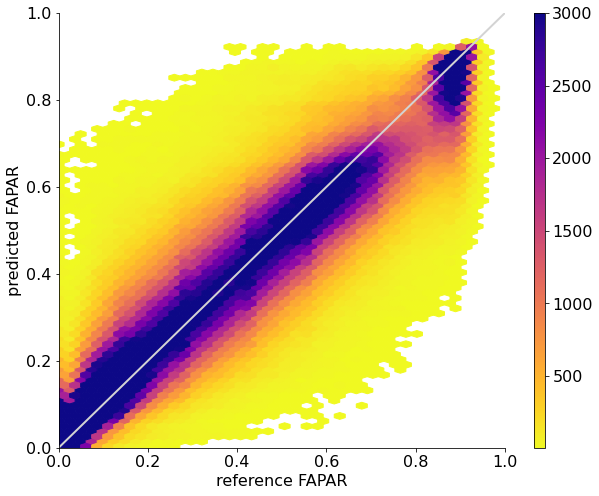

In [218]:
# accuracy_plot(m.target, m.eval_pred, df_weights_scaled_subs['sample_weight'], len(m.feature_cols))

In [219]:
m.eval_metrics

{'r2': 0.8898075045580974, 'rmse': 0.09616794629461088}

# variable importance plot

In [ ]:
rf_sel_imp_df = pd.DataFrame()
rf_sel_imp_df["covariates"] = list(m.feature_cols)
rf_sel_imp_df["var_imp_extratr"] = m.estimator_list[0].feature_importances_
rf_sel_imp_df["var_imp_xgb"] = m.estimator_list[1].feature_importances_
rf_sel_imp_df = rf_sel_imp_df.sort_values(by=['var_imp_extratr'], ascending =True)

In [283]:
#rescale var importances to 0-1 scale
def normalized(x):
    normalized = (x-0)/(max(x)-0)
    return normalized
rf_sel_imp_df["var_imp_extratr_resc"] = normalized(rf_sel_imp_df["var_imp_extratr"])
rf_sel_imp_df["vvar_imp_xgb_resc"] = normalized(rf_sel_imp_df["var_imp_xgb"])

In [325]:
#rename covariate names
rf_sel_imp_df["covariates"]

dict_covs_names = {
 'pr_lt_monthly': 'long-term monthly precipitation',
 'pop_count': 'population count',
 'diff_practual_longterm': 'diff actual vs long-term precipitation',
 'diff_tasactual_longterm': 'diff actual vs long-term average temperature',
 'accum_pr_monthly': 'monthly accumulated precipitation',
 'scd': 'snow cover days',
 'hfp': 'human footprint index',
 'geomt_gap_maxmin': 'diff max vs min geometric temperature',
 'fapar_q': 'FAPAR percentile (5, 50, 95)',
 'tmax_monthly': 'max monthly temperature',
 'geomt_max': 'max geometric temperature',
 'tas_monthly': 'average monthly temperature',
 'tas_lt_monthly': 'long-term monthly temperature',
 'geomt_min': 'min geometric temperature',
 'geomt_max': 'max geometric temperature',
 'tmin_monthly': 'min monthly temperature',
 'log_csum_pr_annual': 'log cumulative annual precipiation sum',
 'gsl': 'growing season length',
 'forest_ind': 'forest indicator',
 'shrubland_ind': 'shrubland indicator',
 'cropland_ind': 'cropland indicator',
 'grassland_ind': 'grassland indicator',
 'crop_intensity': 'cropland intensity'}

rf_sel_imp_df_re = rf_sel_imp_df.copy()
rf_sel_imp_df_re['covariates'].replace(dict_covs_names, inplace=True)

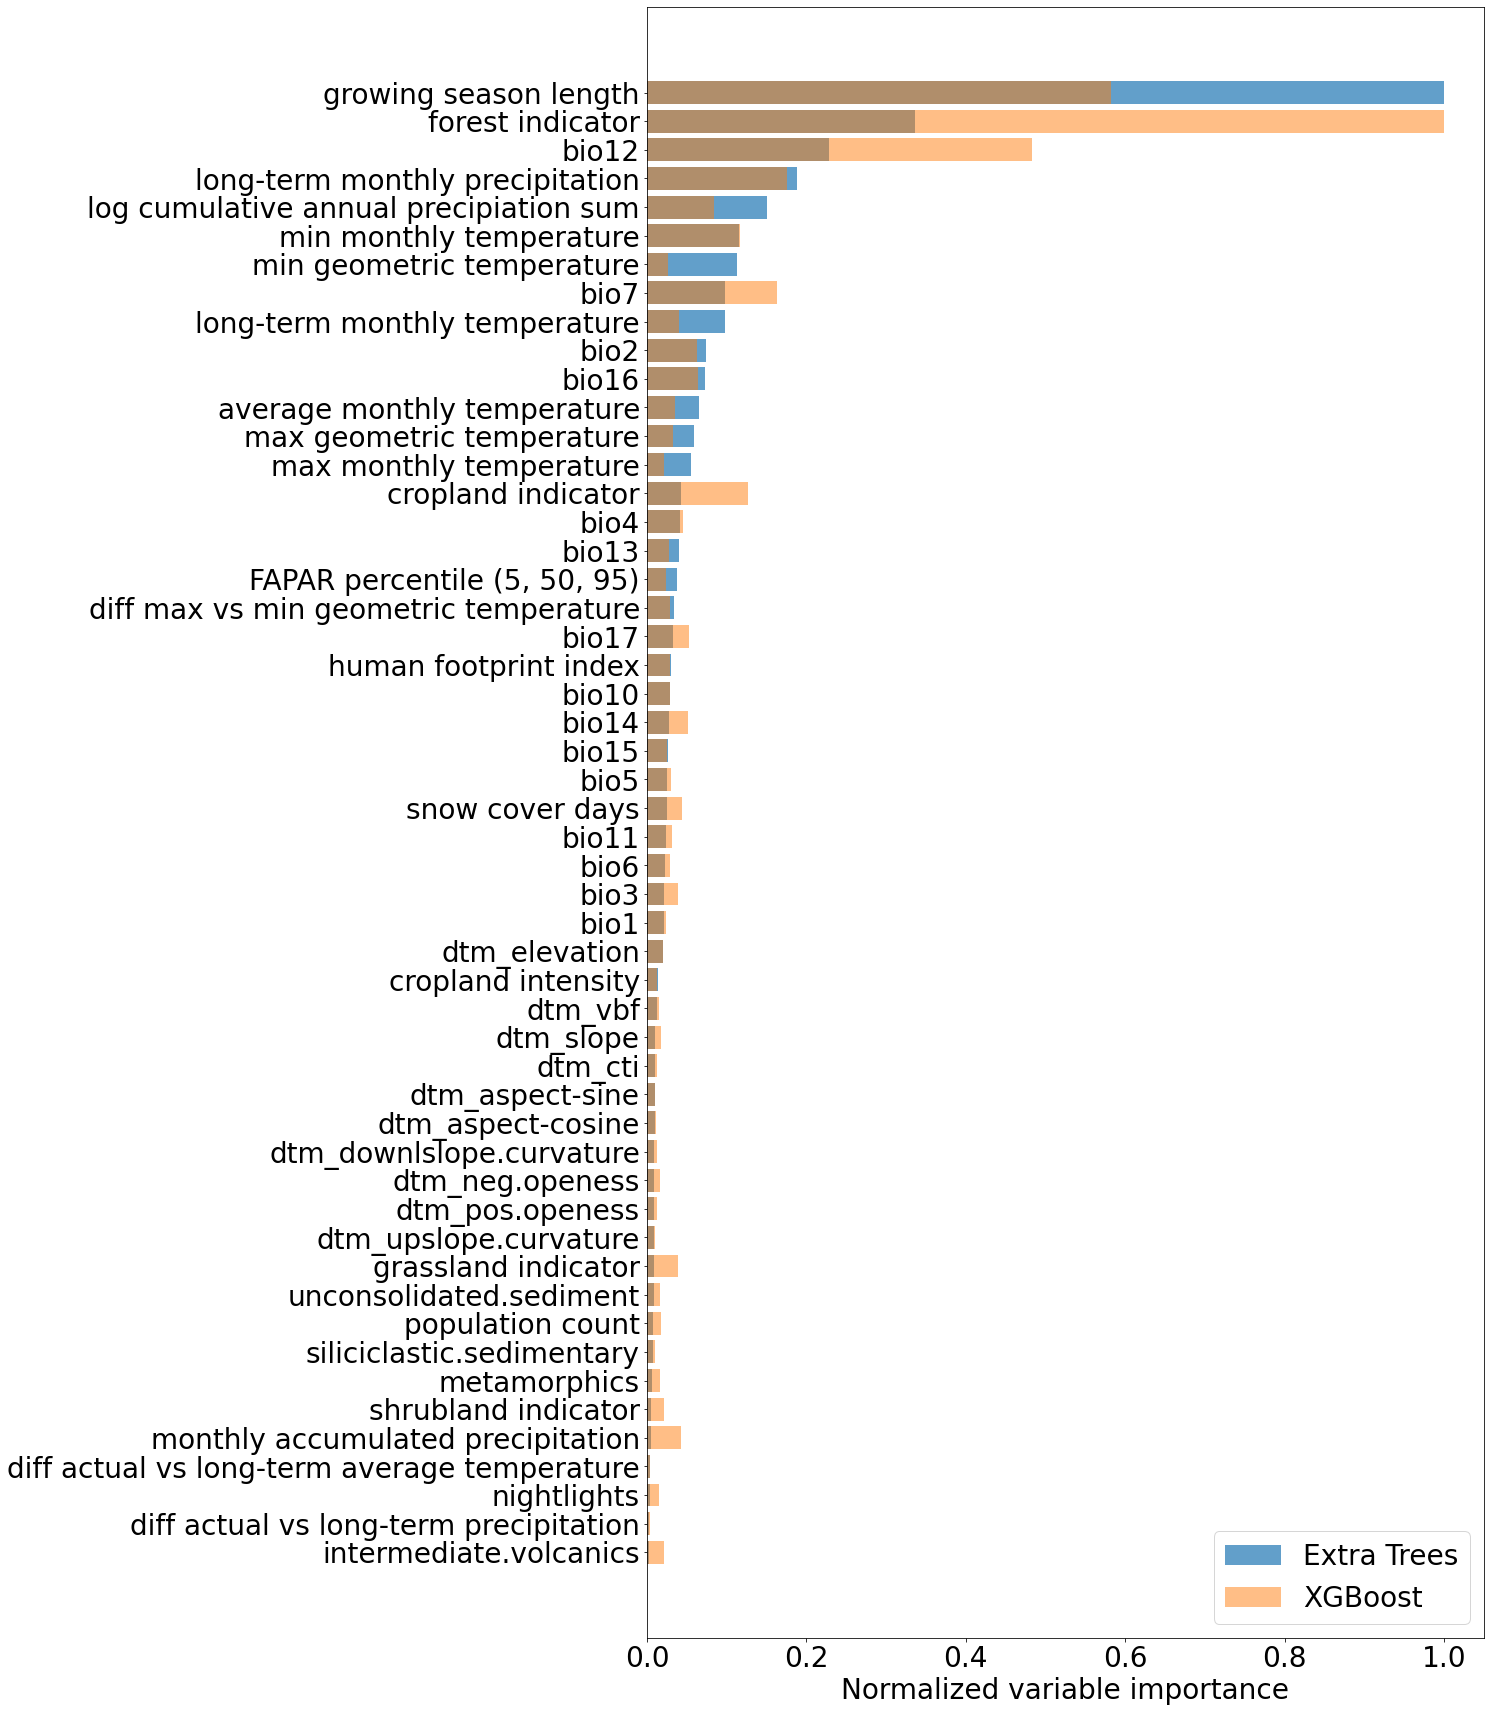

In [327]:
#variable importance plot, group into topography, bioclim, vegetation indicators, human pressure, other
fig = plt.subplots(figsize = (15,30))
plt.rcParams.update({'font.size': 28})
# Create horizontal bars
ext_var = plt.barh(rf_sel_imp_df_re["covariates"], rf_sel_imp_df_re["var_imp_extratr_resc"], alpha=0.7)
xgb_var = plt.barh(rf_sel_imp_df_re["covariates"], rf_sel_imp_df_re["vvar_imp_xgb_resc"], alpha=0.5)
# plt.xticks(rotation = 90)
plt.xlabel("Normalized variable importance")
plt.legend(["Extra Trees", "XGBoost"], loc = "lower right")
# 
# plt.savefig('/mnt/freya/julia/potential_fapar/images/figureX_varImp_extratr_xgb.pdf', bbox_inches='tight')
# ax.set_title("Feature importance in extra-trees model")

In [186]:
# rerun entire EML with ANN sigmoid
from eumap.mapper import build_ann
from eumap.mapper import LandMapper
from eumap.misc import ttprint
from pathlib import Path
from scipy.signal import argrelmin
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.experimental import enable_halving_search_cv 
from sklearn.feature_selection import RFECV, RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GroupKFold, KFold
from sklearn.model_selection import HalvingRandomSearchCV, RandomizedSearchCV
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
# from scikeras.wrappers import KerasRegressor as KerasRegressor
from scipy.stats import uniform, randint
import joblib
import multiprocessing
import numpy as np
import pandas as pd
# import pyarrow.parquet as pq
import sys
import xgboost as xgb
from keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger, ReduceLROnPlateau


target_column = 'fapar_value'
spatial_cv_column = 'id'

cv_njobs = 1  #5
cv_folds = 5
seed = 1989
data = df_weights_scaled_subs
max_resources_val = 20000    


# RF
estimator_rf = ExtraTreesRegressor(n_jobs=-1, max_depth= 92, max_features=  0.8396664399317262, min_samples_leaf= 2, min_samples_split= 16, n_estimators= 44, random_state=seed)

# Xgboost
estimator_xb = xgb.XGBRegressor(n_jobs=-1, alpha= 1.1895251501978723, colsample_bylevel= 0.6576823276982753, colsample_bynode=0.4700932760299571, colsample_bytree= 0.8820483594195913, eta=1.9985590859962972, 
                gamma= 0.05329958188760653, learning_rate= 0.06158218973000773, max_depth= 50, n_estimators= 81, reg_alpha= 0.0068449376757660834, reg_lambda= 0.11745310090917319, objective='reg:squarederror', tree_method='hist', booster='gbtree', 
    use_label_encoder=False, random_state=seed)

# ANN
input_shape = len(covs_rfe)

# dir_model = '/mnt/freya/julia/potential_fapar/data/models'
# model_name = 'pot_fapar_ann_v20230921'

estimator_ann = Pipeline([
    ('standardize', preprocessing.MinMaxScaler(clip=True,feature_range=(0,1))),  
    ('estimator', KerasRegressor(build_ann, input_shape=input_shape, output_shape=1, \
        epochs=10, batch_size=256, learning_rate = 0.0005, activation = 'relu', loss='mean_absolute_error', \
        dropout_rate=0.15, n_layers = 4, n_neurons=128, output_activation='sigmoid',  shuffle=True, verbose=2))], #callbacks=callbacks,
    verbose=2)

# LinearRegression
meta_estimator = LinearRegression()

# LandMapper
cv_method = GroupKFold(cv_folds)

estimator_list = [estimator_rf, estimator_xb, estimator_ann] 
# hyperpar_selection_list = [hyperpar_rf, hyperpar_xb, None] 

m_ann = LandMapper(points=df_weights_scaled_subs, 
    feat_cols = covs_rfe, 
    target_col = target_column,
    estimator = estimator_ann,
#     estimator_list = estimator_list, 
#     hyperpar_selection_list = hyperpar_selection_list,
#     meta_estimator = meta_estimator,
#     hyperpar_selection_meta = hyperpar_meta,
    cv = cv_method,
    cv_njobs=int(cv_njobs),
    cv_group_col = spatial_cv_column,
    n_jobs = 10,
    verbose = True)

m_ann.train()

fn_landmapper = 'pot_fapar_ann_sigmoid_v20230921_all3Mio.lz4'
m_ann.save_instance(fn_landmapper)

[20:23:47] Calculating evaluation metrics
[Pipeline] ....... (step 1 of 2) Processing standardize, total=   0.9s
Epoch 1/10
9788/9788 - 129s - loss: 0.0826
Epoch 2/10
9788/9788 - 125s - loss: 0.0700
Epoch 3/10
9788/9788 - 126s - loss: 0.0666
Epoch 4/10
9788/9788 - 129s - loss: 0.0647
Epoch 5/10
9788/9788 - 126s - loss: 0.0634
Epoch 6/10
9788/9788 - 122s - loss: 0.0625
Epoch 7/10
9788/9788 - 124s - loss: 0.0617
Epoch 8/10
9788/9788 - 126s - loss: 0.0611
Epoch 9/10
9788/9788 - 128s - loss: 0.0607
Epoch 10/10
9788/9788 - 127s - loss: 0.0603
[Pipeline] ......... (step 2 of 2) Processing estimator, total=21.0min
2447/2447 - 6s
[Pipeline] ....... (step 1 of 2) Processing standardize, total=   0.9s
Epoch 1/10
9788/9788 - 133s - loss: 0.0832
Epoch 2/10
9788/9788 - 124s - loss: 0.0706
Epoch 3/10
9788/9788 - 126s - loss: 0.0674
Epoch 4/10
9788/9788 - 124s - loss: 0.0656
Epoch 5/10
9788/9788 - 123s - loss: 0.0644
Epoch 6/10
9788/9788 - 121s - loss: 0.0635
Epoch 7/10
9788/9788 - 122s - loss: 0.062

In [187]:
m_rf = LandMapper(points=df_weights_scaled_subs, 
    feat_cols = covs_rfe, 
    target_col = target_column,
    estimator = estimator_rf,
#     estimator_list = estimator_list, 
#     hyperpar_selection_list = hyperpar_selection_list,
#     meta_estimator = meta_estimator,
#     hyperpar_selection_meta = hyperpar_meta,
    cv = cv_method,
    cv_njobs=int(cv_njobs),
    cv_group_col = spatial_cv_column,
    n_jobs = 10,
    verbose = True)

m_rf.train()

[22:46:58] Calculating evaluation metrics
[22:51:25] Training ExtraTreesRegressor using all samples


In [188]:
m_xgb = LandMapper(points=df_weights_scaled_subs, 
    feat_cols = covs_rfe, 
    target_col = target_column,
    estimator = estimator_xb,
    cv = cv_method,
    cv_njobs=int(cv_njobs),
    cv_group_col = spatial_cv_column,
    n_jobs = 10,
    verbose = True)

m_xgb.train()

[22:53:20] Calculating evaluation metrics
[01:42:20] Training XGBRegressor using all samples


In [192]:
m_ann.eval_metrics

{'r2': 0.8655835323069518, 'rmse': 0.10621373}

In [193]:
m_rf.eval_metrics

{'r2': 0.8836823311253533, 'rmse': 0.09880460298123059}

In [194]:
m_xgb.eval_metrics

{'r2': 0.8835735395362352, 'rmse': 0.09885078}

In [328]:
m_xgb.eval_metrics

{'r2': 0.8835735395362352, 'rmse': 0.09885078}